### Question 1: On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

1.1. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

The best way to resolve this issue is to take a look at the data as a whole, take a look at its statistical properties, and plot the data (if necessary).

In [22]:
# importing packages for data analysis
import pandas as pd # used to read in the Shopify CSV file

In [23]:
# reading in the data
shopify_df = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")
# taking a look at the first five row entries of the data
shopify_df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,3/13/2017 12:36
1,2,92,925,90,1,cash,3/3/2017 17:38
2,3,44,861,144,1,cash,3/14/2017 4:23
3,4,18,935,156,1,credit_card,3/26/2017 12:43
4,5,18,883,156,1,credit_card,3/1/2017 4:35


In [21]:
# summary statistics of the "order_amount" column variable
shopify_df.order_amount.describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

Given that there is an issue in terms of the average order value (AOV) column, I've returned some of the summary statistics of the column entries. The "mean" value from the output above is the AOV value in question. At first glance, there appears to be some outlier values in the data. The standard deviation of the values is incredibly high (41282.539349), and the max value of the column entries is 704000 dollars. Because of these outliers, mean is probably not the best indicator of AOV.

To better understand the spread of order totals, I've created a boxplot below for the "order_amount" column in question.

<AxesSubplot:>

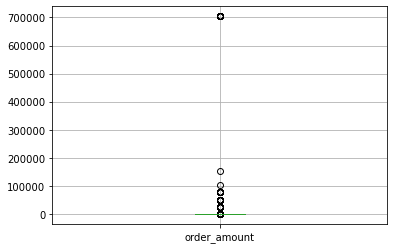

In [13]:
shopify_df.boxplot(column = "order_amount")

It turns out that there are several outlier valules (denoted by the circles along the vertical line of the figure. In fact, we can hardly see the actual "box" of the boxplot, an indication that most of the column entries are infact much less than the outlier values suggest. Analyzing the outliers more closely may help us underatand how to go about dealing with them. I've grouped the unique order total values below, and have displayed the ten highest unique values.

In [14]:
unique_order_totals = shopify_df.groupby(["order_amount"]).size().reset_index(name = "count").sort_values(by='order_amount', ascending = False)
unique_order_totals.head(10)

,order_amount,count
257,704000,17
256,154350,1
255,102900,1
254,77175,9
253,51450,16
252,25725,19
251,1760,1
250,1408,2
249,1086,1
248,1064,1


There are four outlier order totals that show up more than once in the dataset, three of these more than ten times! By taking a closer look at the other column entries for these specific order amounts, we may be able to uncover a pattern in the data.

In [32]:
# examining the full details of two repeated order totals
shopify_df.loc[shopify_df["order_amount"].isin([704000, 25725])].sort_values(by = "order_amount", ascending = False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,3/7/2017 4:00
4056,4057,42,607,704000,2000,credit_card,3/28/2017 4:00
3332,3333,42,607,704000,2000,credit_card,3/24/2017 4:00
2835,2836,42,607,704000,2000,credit_card,3/28/2017 4:00
60,61,42,607,704000,2000,credit_card,3/4/2017 4:00
2297,2298,42,607,704000,2000,credit_card,3/7/2017 4:00
2153,2154,42,607,704000,2000,credit_card,3/12/2017 4:00
1602,1603,42,607,704000,2000,credit_card,3/17/2017 4:00
1562,1563,42,607,704000,2000,credit_card,3/19/2017 4:00
1436,1437,42,607,704000,2000,credit_card,3/11/2017 4:00


As expected, some patterns have emerged. Looking at the orders amounting to 704000 dollars, the table above indicates that these orders happen at the same time of day (4:00 am), contain the same number of items each time, and are bought and sold by the same two parties each time. Knowing this, it's likely that these transactions are predetermined in nature, a bulk order between a particular buyer and supplier with the purpose of reselling.

On a similar note, the orders amounting to 25725 dollars are are fullfilled by the same store or seller (78). Given that the other two repeated order totals are 77175 dollars and 51450 dollars, and that each of these values is an exact multiple of 25725, there may be a specific pattern emerging between these orders.

In [33]:
# examining the full details of two repeated order totals
shopify_df.loc[shopify_df["order_amount"].isin([77175, 51450])].sort_values(by = "order_amount", ascending = False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
4715,4716,78,818,77175,3,debit,3/5/2017 5:10
4420,4421,78,969,77175,3,debit,3/9/2017 15:21
1259,1260,78,775,77175,3,credit_card,3/27/2017 9:27
4192,4193,78,787,77175,3,credit_card,3/18/2017 9:25
3724,3725,78,766,77175,3,credit_card,3/16/2017 14:13
2564,2565,78,915,77175,3,debit,3/25/2017 1:19
2690,2691,78,962,77175,3,debit,3/22/2017 7:33
3403,3404,78,928,77175,3,debit,3/16/2017 9:45
2906,2907,78,817,77175,3,debit,3/16/2017 3:45
3167,3168,78,927,51450,2,cash,3/12/2017 12:23


As it turns out, the orders totalling to 77175 dollars and 51450 dollars are all sold by the same shop. Furthermore, the average value of each item in all of the orders above is the exact same (77175 / 3 = 51450 / 2 = 25725). Knowing this, it's plausible that orders totalling to 77175 dollars and 51450 dollars are really just transactions in which the buyer bought three or two items of the same value, each worth 25725 dollars.

Now that we have some idea as to the nature of these outlying transactions, we can filter them out of the analysis by looking at order totals that fall within the inter quartile range (IQR) of the original distribution of column entries. As a common measure of variability, IQR shows us the values that fall within 1.5x the median value of the dataset. 

Using a similar process as before, we can look at the filtered data table, examine its summary statistics, and plot its distribution with a boxplot.

In [24]:
# removing outliers from the dataset by only including order amounts that 
# fall within the interquartile range or midspread of the distribution

order_total_q1 = shopify_df.order_amount.quantile(q = 0.25)
order_total_q2 = shopify_df.order_amount.quantile(q = 0.5)
order_total_q3 = shopify_df.order_amount.quantile(q = 0.75)
IQR = order_total_q3 - order_total_q1 

filtered_shopify_df = shopify_df[(shopify_df.order_amount < order_total_q2 + IQR * 1.5) & (shopify_df.order_amount > order_total_q2 - IQR * 1.5)]
filtered_shopify_df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,3/13/2017 12:36
1,2,92,925,90,1,cash,3/3/2017 17:38
2,3,44,861,144,1,cash,3/14/2017 4:23
3,4,18,935,156,1,credit_card,3/26/2017 12:43
4,5,18,883,156,1,credit_card,3/1/2017 4:35


In [25]:
# summary statistics for the filtered Shopify dataset
filtered_shopify_df.order_amount.describe()

count    4738.000000
mean      283.814268
std       132.061996
min        90.000000
25%       161.000000
50%       272.000000
75%       362.000000
max       624.000000
Name: order_amount, dtype: float64

<AxesSubplot:>

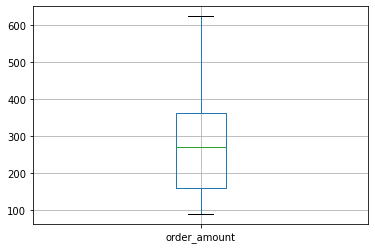

In [26]:
# creating a boxplot for the filtered Shopify dataset
filtered_shopify_df.boxplot(column = 'order_amount')

Finally! A boxplot that actually looks like a boxplot. By filtering out some of the outlier values, the summary statistics and distribution of order totals feels more intuitive (given that we're lookig at sneaker sales). The mean order value is now 283.814268 dollars, and the maximum order totals 624 dollars.

1.2. What metric would you report for this dataset?

Because the median order value of the full data is similar to the median order value of the filtered data (284 vs. 272), it makes sense to use median as a proxy for AOV. As a statistic, median is more robust than mean when it comes to addressing outliers. 

1.3. What is its value?

Looking at the summary statistics table for the original "shopify_df" tells us that the median order value for the entire data set is 284 dollars. Meanwhile, the medianorder value for the new "filtered_shopify_df" is 272 dollars.

### Question 2: For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

2.1. How many orders were shipped by Speedy Express in total?

The following query joins the "Orders" data table to the "Shippers" data table on the "ShipperID" column to return the sum total of orders completed by Speedy Express. 

- SELECT COUNT(*) AS NumberOfOrders
- FROM [Orders]
- JOIN [Shippers]
    - ON [Shippers].ShipperID = [Orders].ShipperID
- WHERE [Shippers].ShipperName = 'Speedy Express'
##### Output: Number of Orders (54)

The query shows that Speedy Express shipped 54 orders in total.

2.2. What is the last name of the employee with the most orders?

The problem can be tackled by counting the number of orders each employee has completed, ordering the employee names by the number of orders completed, and returning the employee with the most orders completed.

- SELECT [Employees].LastName, COUNT(*) AS NumberOfOrders
- FROM [Orders]
- JOIN [Employees]
    - ON [Orders].EmployeeID = [Employees].EmployeeID
- GROUP BY [Employees].LastName
- ORDER BY NumberOfOrders DESC
- LIMIT 1
##### Output: Last Name (Peacock), Number of Orders (40)

The last name of the employee with the most orders fulfilled is "Peacock" with 40 orders.

2.3. What product was ordered the most by customers in Germany?

The solution to this question requirews three different queries to be applied to the data set. The first of these queries involves identifying all orders made by German customers, written below.

- SELECT [Orders].OrderID, [Customers].Country
- FROM [Orders]
- JOIN [Customers]
    - ON [Customers].CustomerID = [Orders].CustomerID
- WHERE [Customers].Country = 'Germany'
##### Output: Order ID (25 unique five digit record), Country (Germany Only)

To find the name of the product with the most orders, I first need to find out which product ID was ordered the most in Germany. The following query sums the quantity column, groups by order ID, and uses product ID and quantity from the "OrderDetails" data table to determine the sum quantity of each unique product. 

- SELECT [Customers].Country, [OrderDetails].ProductID, SUM([OrderDetails].Quantity) AS "TotalOrdered"
- FROM [Orders]
- JOIN [Customers]
    - ON [Customers].CustomerID = [Orders].CustomerID
- JOIN [OrderDetails]
    - ON [OrderDetails].OrderID = [Orders].OrderID
- WHERE [Customers].Country = 'Germany'
- GROUP BY [OrderDetails].ProductID
- ORDER BY TotalOrdered DESC 
##### Output: Country (Germany Only), Product ID (45 unique one or two digit records), Total Ordered (one entry per product ID, sorted from greatest to least)

The final step is to convert IDs to names by joining the "Products" data table on the "ProductID" column to get the names of each product, ordered by number of orders.

- SELECT [Products].ProductName,
    - SUM([OrderDetails].Quantity) AS "TotalOrdered"
- FROM [Orders]
- JOIN [Customers]
    - ON [Customers].CustomerID = [Orders].CustomerID
- JOIN [OrderDetails]
    - ON [OrderDetails].OrderID = [Orders].OrderID
- JOIN [Products]
    - ON [Products].ProductID = [OrderDetails].ProductID
- WHERE [Customers].Country = 'Germany'
- GROUP BY [OrderDetails].ProductID
- ORDER BY TotalOrdered DESC 
##### Output: Product Name (45 unique items), Total Ordered (one entry per product name, sorted from greatest to least)

The third query outputs a list of unique products and the number of orders it has. Boston Crab Meat is the most ordered product in Germany with 160 total orders.